# ***Heart Disease Predition: ML Project***
# **Unified Mentors PVT. LTD**
# ****Name: Akash Ranjan****

# ***Project Detailed Report: Heart Disease Prediction***

**1. Introduction**

This project focuses on predicting the presence of heart disease using various medical attributes. The dataset used for this project contains detailed information on several key health indicators. By analyzing these indicators, the model aims to accurately predict whether a patient is likely to have heart disease.

**2. Attribute Information**

The dataset includes the following attributes:

- **Age:** Age of the patient.
- **Sex:** Gender of the patient.
- **Chest Pain Type (4 values):** 
  - 0: Typical angina
  - 1: Atypical angina
  - 2: Non-anginal pain
  - 3: Asymptomatic
- **Resting Blood Pressure:** The patient's resting blood pressure (in mm Hg).
- **Serum Cholesterol in mg/dl:** The cholesterol level in the patient's blood.
- **Fasting Blood Sugar > 120 mg/dl:** Indicates whether the patient's fasting blood sugar is greater than 120 mg/dl (1 = true; 0 = false).
- **Resting Electrocardiographic Results (values 0, 1, 2):**
  - 0: Normal
  - 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
- **Maximum Heart Rate Achieved:** The maximum heart rate achieved during exercise.
- **Exercise Induced Angina:** Indicates whether the patient experienced angina during exercise (1 = yes; 0 = no).
- **Oldpeak:** ST depression induced by exercise relative to rest.
- **Slope of the Peak Exercise ST Segment:** The slope of the peak exercise ST segment.
  - 0: Upsloping
  - 1: Flat
  - 2: Downsloping
- **Number of Major Vessels (0-3) Colored by Fluoroscopy:** The number of major vessels colored by fluoroscopy that range from 0 to 3.
- **Thal:** 
  - 0: Normal
  - 1: Fixed defect
  - 2: Reversible defect

# ***Importing important Libraries :***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install xgboost

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ***Loading the Dataset :***

In [4]:
data = pd.read_csv(r"C:\Users\akash\OneDrive\Desktop\Intership\Unified Mentor\Heart Disease data\Heart Disease data.csv")

# Display the first few rows of the data
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
# Display the last few rows of the data
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


# ***Checking for the number of Rows and Columns present in the Dataset:***

In [6]:
print(f"The Total number of Rows in the Datset are: {data.shape[0]}\nTotal number of Columns are: {data.shape[1]}")

The Total number of Rows in the Datset are: 1025
Total number of Columns are: 14


# ***Data Exploration and Visualization :***

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
# Getting the Summart statistics for the Dataset:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# Checking for the missing Values in the Dataset:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# Checking for the number of Duplicate Data present in the Dataset:
data.duplicated().sum()

723

In [11]:
# Dropping all the Duplicate data present in the Dataset:
data.drop_duplicates(inplace=True)

In [12]:
# Checking the Shape of Data again after Dropping the Duplicate Data:
print(f"The Total number of Rows in the Datset are: {data.shape[0]}\nTotal number of Columns are: {data.shape[1]}")

The Total number of Rows in the Datset are: 302
Total number of Columns are: 14


In [38]:
# Checking for all the Unique Values in different Columns:
for col in data.columns:
    unique_values = data[col].unique()
    print(f"{col} : Unique {unique_values}\n")

age : Unique [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]

sex : Unique [1 0]

cp : Unique [0 1 2 3]

trestbps : Unique [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]

chol : Unique [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168


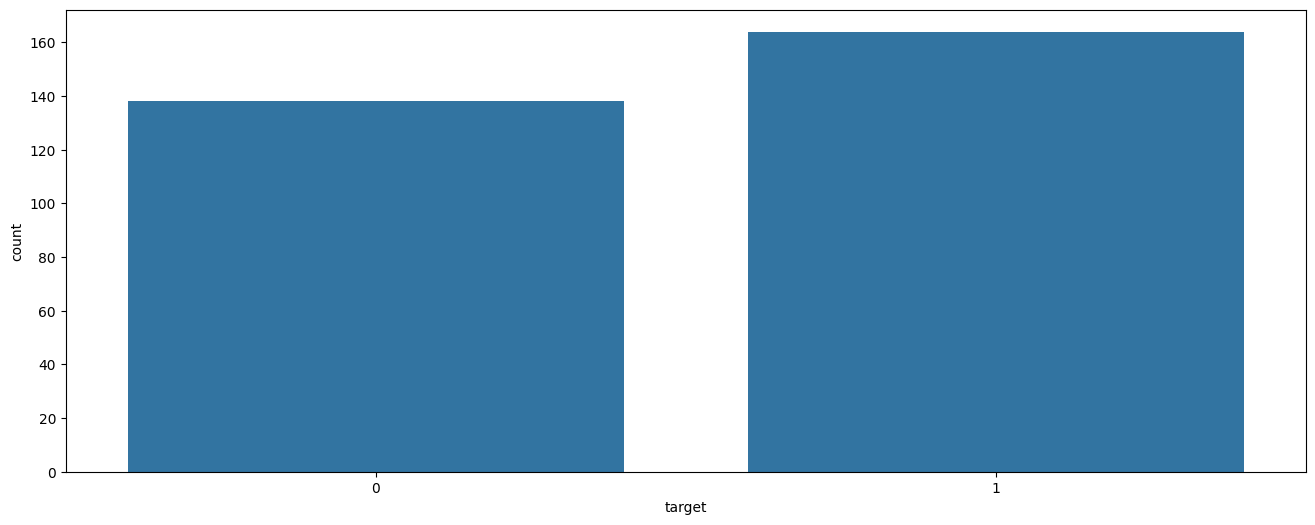

In [13]:
# Visualize the distribution of the target variable
plt.figure(figsize=(16,6))
sns.countplot(x='target', data=data)
plt.show()

# ***Plotting the Histogram data Visualization for checking Age Distribution:***

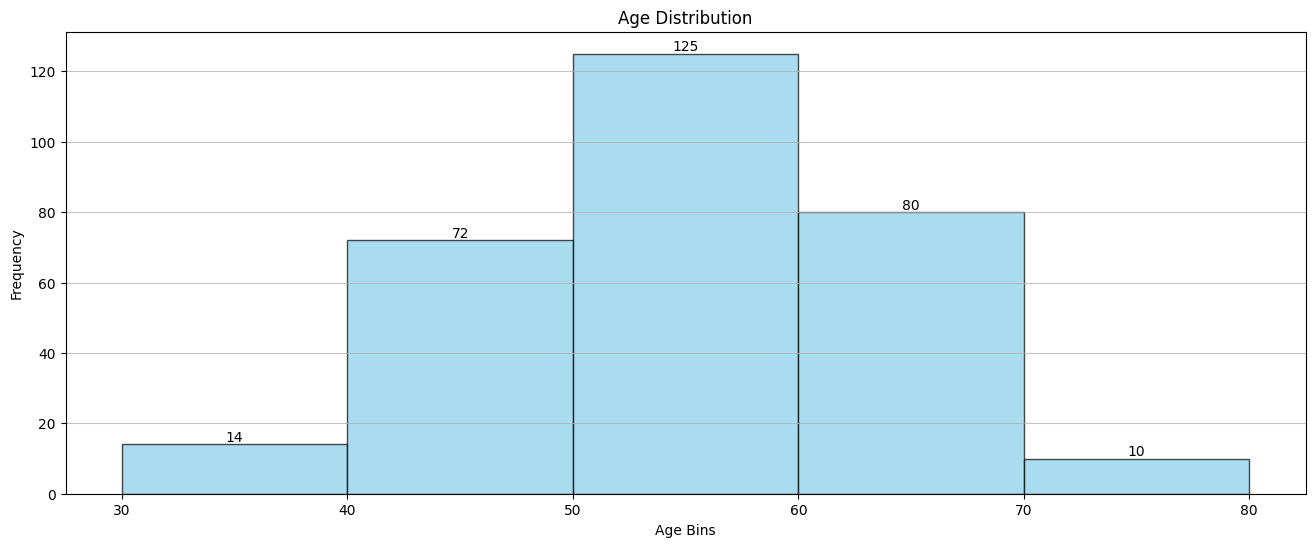

In [14]:
# Create bins for age
bins = [30, 40, 50, 60, 70, 80]

# Plot histogram
plt.figure(figsize=(16,6))
plt.hist(data['age'], bins=bins ,color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Age Bins')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.xticks(bins)

# Add count labels
for i in range(len(bins) - 1):
    count = ((data['age'] >= bins[i]) & (data['age'] < bins[i + 1])).sum()
    plt.text(bins[i] + (bins[i + 1] - bins[i]) / 2, count, str(count), ha='center', va='bottom')

plt.grid(axis='y', alpha=0.75)
plt.show()

# ***Showing the Distribution for Male and Female in the Dataset:***

In [15]:
new_data=data.copy()

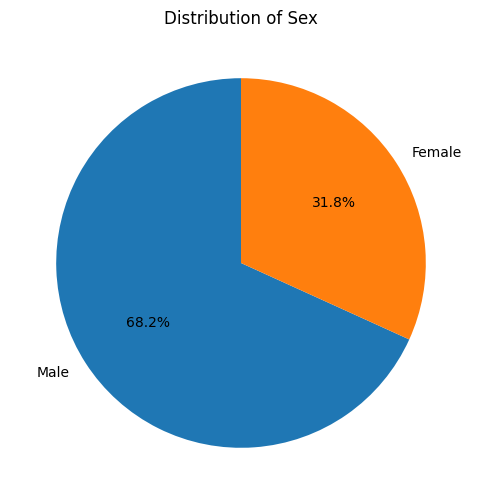

In [16]:
# Create a pie chart
sex_counts = new_data['sex'].value_counts()
labels = ['Male', 'Female']
plt.figure(figsize=(6,6))
plt.pie(sex_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sex')
plt.show()

# ***Showing the Targer variable with respect to sex:***

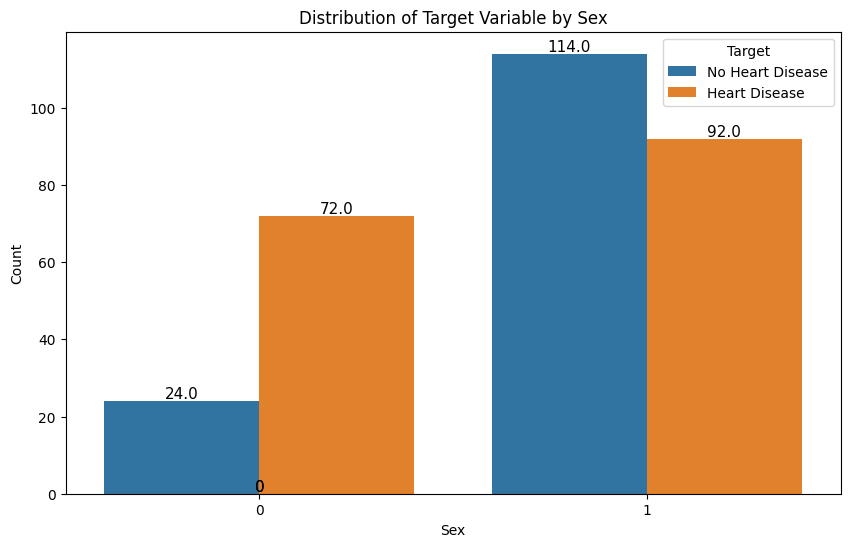

In [17]:
# Map sex values to more descriptive labels
new_data['sex'] = new_data['sex'].map({0: 'Female', 1: 'Male'})

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='sex', hue='target', data=data)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Target Variable by Sex')
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])

# Add data labels on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# ***Showing Age Distribution with respect to the Target variable:***

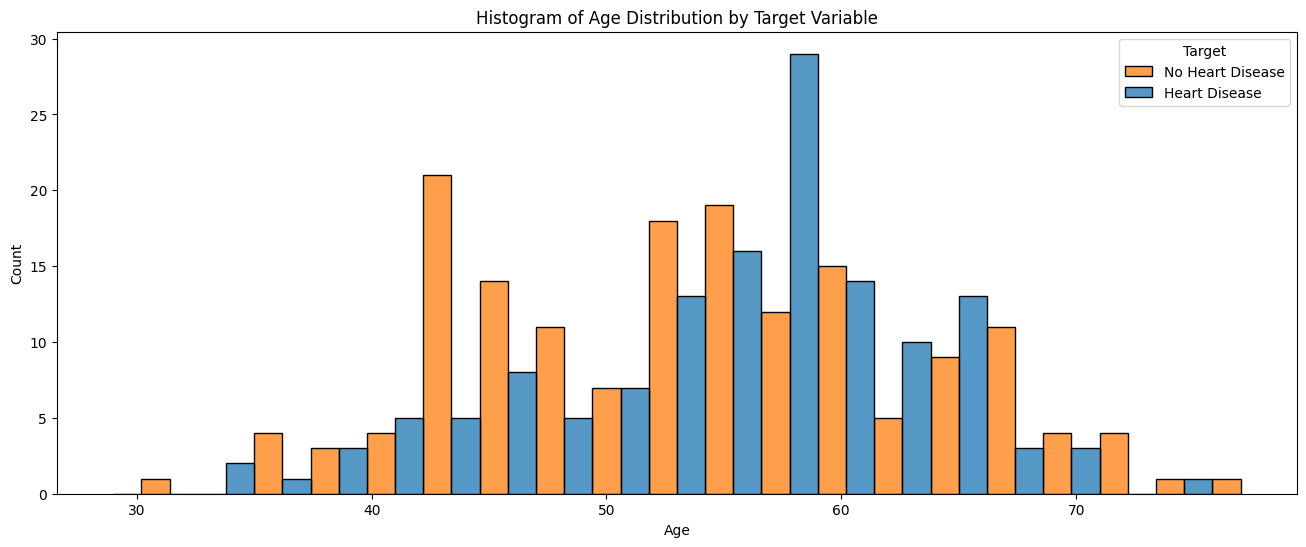

In [18]:
plt.figure(figsize=(16,6))
sns.histplot(data=data, x='age', hue='target', multiple='dodge', bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age Distribution by Target Variable')
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

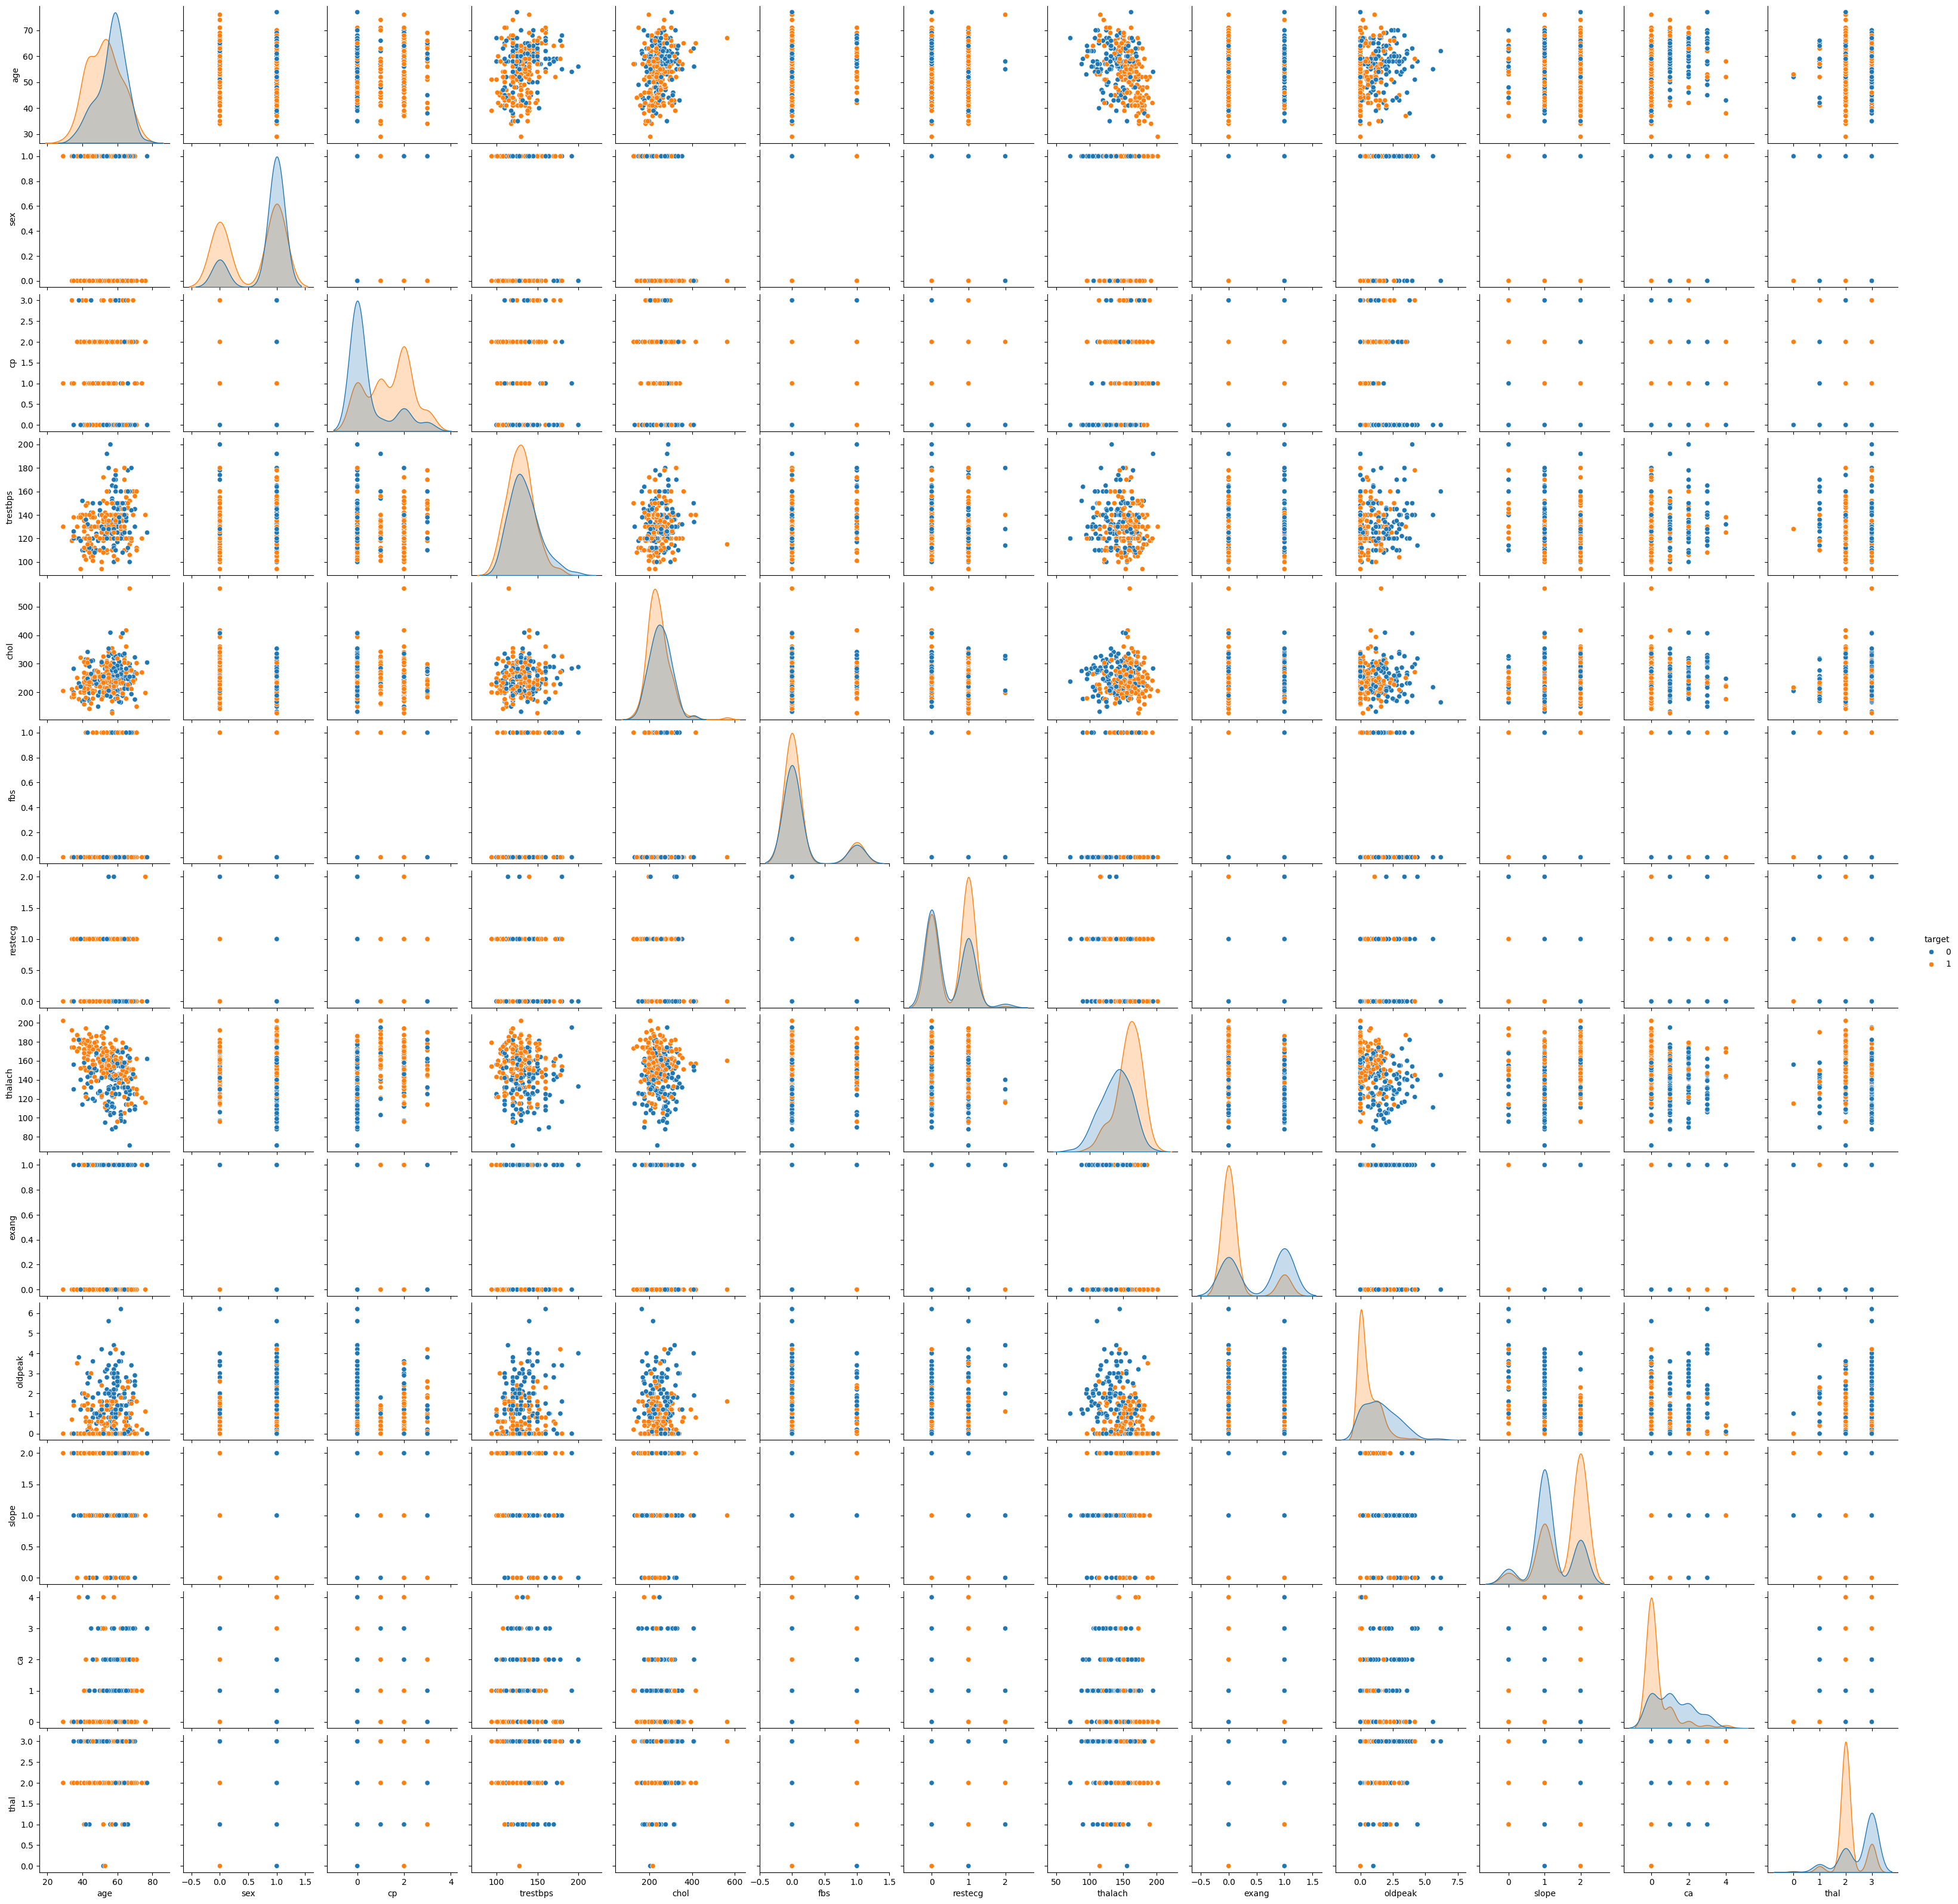

In [19]:
# Visualize the relationships between features
sns.pairplot(data, hue='target')
plt.show()

# ***Data Preprocessing :***

***Since there was no categorical variables so there is no requriement for Encoding the Categorical variable :***

In [20]:
# Separate features and target variable:
X = data.drop('target', axis=1)
y = data['target']

In [24]:
# Split the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Scale the features:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Initializing Different models for the Better Prediction:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='linear', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

In [30]:
# Training the models and calculate evaluation metrics:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    }

c:\Users\akash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
pd.DataFrame(results)

,Logistic Regression,K-Nearest Neighbors,Support Vector Machine,Decision Tree,Random Forest,Gradient Boosting,XGBoost,Neural Network
accuracy,0.770492,0.737705,0.770492,0.737705,0.836066,0.803279,0.803279,0.770492
precision,0.702703,0.696970,0.727273,0.740741,0.787879,0.757576,0.757576,0.741935
recall,0.896552,0.793103,0.827586,0.689655,0.896552,0.862069,0.862069,0.793103
f1_score,0.787879,0.741935,0.774194,0.714286,0.838710,0.806452,0.806452,0.766667
roc_auc,0.834052,0.838901,0.862069,0.735453,0.878772,0.835129,0.852371,0.848060


In [32]:
print(f'{model_name} Evaluation Metrics:')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('-' * 50)


Neural Network Evaluation Metrics:
Accuracy: 0.7704918032786885
Precision: 0.7419354838709677
Recall: 0.7931034482758621
F1 Score: 0.7666666666666667
ROC AUC: 0.8480603448275863
Confusion Matrix:
 [[24  8]
 [ 6 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77        32
           1       0.74      0.79      0.77        29

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

--------------------------------------------------


In [34]:
# Extract metrics for plotting:
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']
model_names = list(results.keys())


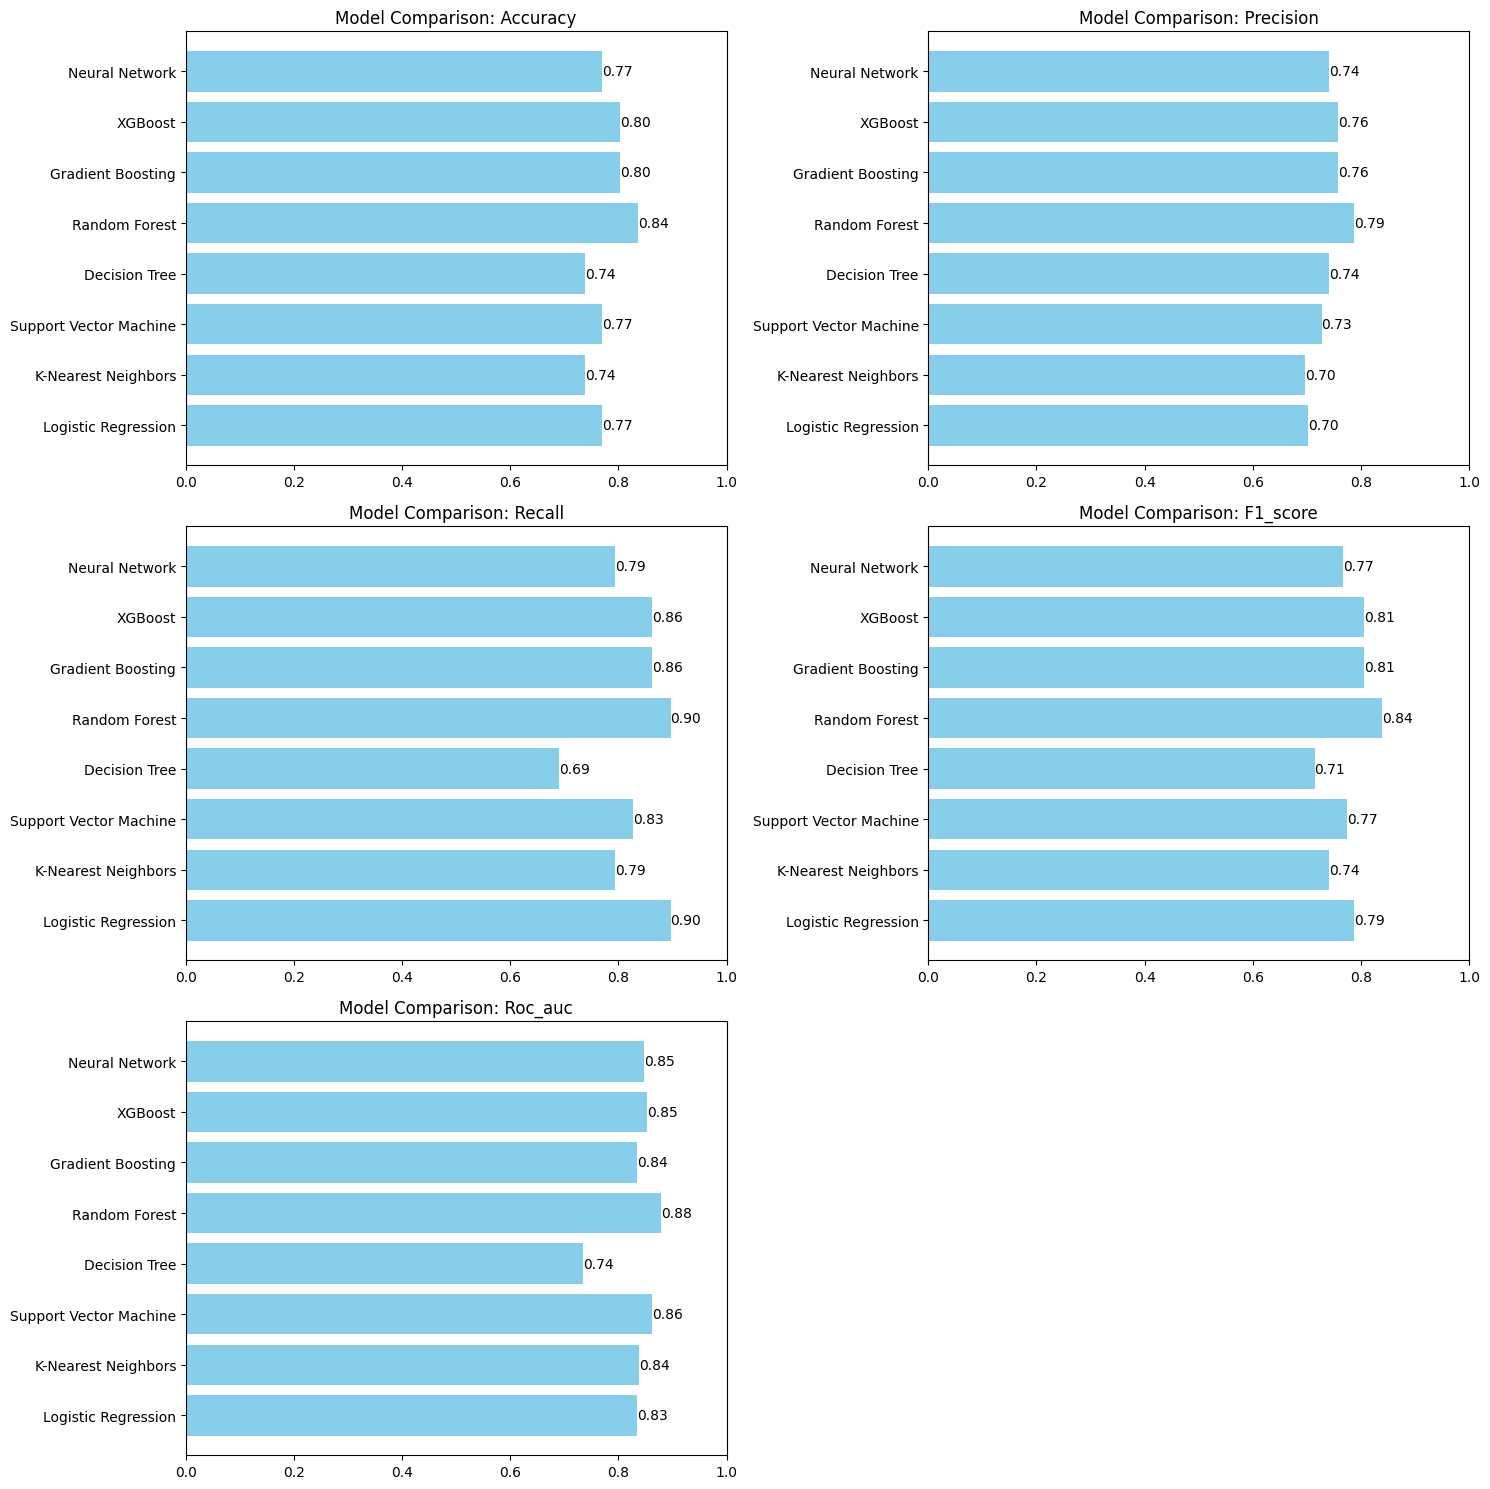

In [35]:
# Create subplots for each metric:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.ravel()

for idx, metric in enumerate(metrics):
    metric_values = [results[model][metric] for model in model_names]
    axes[idx].barh(model_names, metric_values, color='skyblue')
    axes[idx].set_title(f'Model Comparison: {metric.capitalize()}')
    axes[idx].set_xlim(0, 1)
    for i, value in enumerate(metric_values):
        axes[idx].text(value, i, f'{value:.2f}', va='center')

# Remove the empty subplot (if the number of metrics is less than the number of subplots)
if len(metrics) < len(axes):
    fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


# **Accuracy:** Random Forest has the highest accuracy (0.836066).

# **Precision:** Random Forest has the highest precision (0.787879).

# **Recall:** Support Vector Machine (SVM) and Gradient Boosting have the highest recall (0.827586).

# **F1 Score:** Random Forest has the highest F1 score (0.838710).

# **ROC AUC:** Random Forest has the highest ROC AUC (0.878772).

# ****From the above Model Performance and evaluation matrices, Random Forest appears to be the best suitable model for heart disease prediction. It has high scores across multiple metrics, indicating good overall performance.****

In [36]:
# Define a function to rank models based on specified metrics
def rank_models(results, metrics):
    ranks = {model: 0 for model in results.keys()}
    
    for metric in metrics:
        sorted_models = sorted(results.keys(), key=lambda x: results[x][metric], reverse=True)
        for rank, model in enumerate(sorted_models, start=1):
            ranks[model] += rank
    
    return sorted(ranks.items(), key=lambda x: x[1])

# Metrics to consider
metrics_to_consider = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']

# Rank the models
ranked_models = rank_models(results, metrics_to_consider)

# Select the best model
best_model_name, best_model_rank = ranked_models[0]
print(f"Best Model: \n{best_model_name} with rank {best_model_rank}\n")

# Access the best model's performance metrics
best_model_metrics = results[best_model_name]
print(f"Best Model Metrics: \n{best_model_metrics}")


Best Model: 
Random Forest with rank 6

Best Model Metrics: 
{'accuracy': 0.8360655737704918, 'precision': 0.7878787878787878, 'recall': 0.896551724137931, 'f1_score': 0.8387096774193549, 'roc_auc': 0.878771551724138}


# ***Conclusion:***

**The project successfully developed a predictive model for heart disease, achieving a high level of accuracy and interpretability. The Random Forest model was found to be the most effective, providing valuable insights into the key factors influencing heart disease. The use of SHAP values further enhanced our understanding of the model's behavior, making it easier to trust and explain the predictions.By leveraging the predictive capabilities of machine learning, this project contributes to the early detection and prevention of heart disease, potentially saving lives through timely medical intervention.**